In [33]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# df1 = pd.read_csv('../deep_learning/transformer_revised_results_h1_58.csv')
# df1 = pd.read_csv('../deep_learning/mlp_revised_results_h1_61.csv')
df1 = pd.read_csv('../deep_learning/rnn_results_h1_61.csv')
# df1 = pd.read_csv('../deep_learning/mlp_results_h2_61.csv')

In [34]:
df1.head()

,unique_id,ds,AutoRNN,AutoLSTM,AutoGRU,AutoTCN,AutoDilatedRNN,vintage_file
0,1.0,2018-04-01,0.010789,0.012486,0.012188,0.006962,0.012391,vintage_2018_05
1,1.0,2018-04-01,0.008076,0.009704,0.010123,0.007382,0.009996,vintage_2018_06
2,1.0,2018-04-01,0.008372,0.008027,0.006444,0.006300,0.007311,vintage_2018_07
3,1.0,2018-07-01,0.006503,0.007717,0.004798,0.003037,0.006403,vintage_2018_08
4,1.0,2018-07-01,0.007496,0.009542,0.008754,0.007233,0.008592,vintage_2018_09


In [35]:
def load_data(file_path):
    df = (pd.read_csv(file_path)
          .rename(columns={"year_quarter": "ds", "GDPC1": "y"})
          .assign(unique_id=np.ones(len(pd.read_csv(file_path))),
                  ds=lambda df: pd.to_datetime(df['ds'])))
    columns_order = ["unique_id", "ds", "y"] + \
        [col for col in df.columns if col not in ["unique_id", "ds", "y"]]
    
    # Shift 'y' column by one quarter
    # df['y'] = df['y'].shift(+3)

    return df[columns_order]

file_path = '../../data/FRED/blocked/vintage_2023_05.csv'

df2 = load_data(file_path)[['ds', 'y']]

In [36]:
df2

,ds,y
0,1959-04-01,0.022301
1,1959-07-01,0.000705
2,1959-10-01,0.002845
3,1960-01-01,0.022228
4,1960-04-01,-0.005405
...,...,...
252,2022-04-01,-0.001447
253,2022-07-01,0.007980
254,2022-10-01,0.006354
255,2023-01-01,0.003163


In [37]:
# Convert 'ds' to datetime on both dataframes, if not already
df1['ds'] = pd.to_datetime(df1['ds'])
df2['ds'] = pd.to_datetime(df2['ds'])

In [38]:
# Merge the two dataframes
df1 = pd.merge(df1, df2, on='ds', how='left')

In [39]:
df1

,unique_id,ds,AutoRNN,AutoLSTM,AutoGRU,AutoTCN,AutoDilatedRNN,vintage_file,y
0,1.0,2018-04-01,0.010789,0.012486,0.012188,0.006962,0.012391,vintage_2018_05,0.006949
1,1.0,2018-04-01,0.008076,0.009704,0.010123,0.007382,0.009996,vintage_2018_06,0.006949
2,1.0,2018-04-01,0.008372,0.008027,0.006444,0.006300,0.007311,vintage_2018_07,0.006949
3,1.0,2018-07-01,0.006503,0.007717,0.004798,0.003037,0.006403,vintage_2018_08,0.007194
4,1.0,2018-07-01,0.007496,0.009542,0.008754,0.007233,0.008592,vintage_2018_09,0.007194
...,...,...,...,...,...,...,...,...,...
56,1.0,2022-10-01,0.005429,0.006574,0.007101,0.007041,0.006896,vintage_2023_01,0.006354
57,1.0,2023-01-01,0.000767,0.001847,0.000878,0.000263,0.002744,vintage_2023_02,0.003163
58,1.0,2023-01-01,0.006990,0.005374,0.005883,0.005068,0.006976,vintage_2023_03,0.003163
59,1.0,2023-01-01,0.005421,0.005024,0.005045,0.006947,0.004544,vintage_2023_04,0.003163


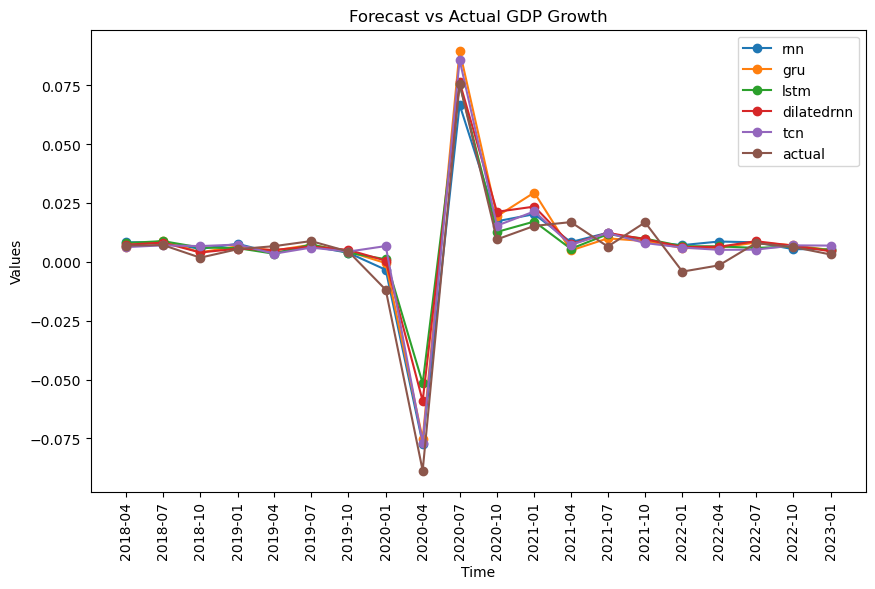

In [41]:
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

# Select every third row starting from the third row (index 2)
df_subset = df1[2::3]

fig, ax = plt.subplots(figsize=(10, 6))

# Plot 'AutoRNN' against 'ds'
ax.plot(df_subset['ds'], df_subset['AutoRNN'], marker='o', label='rnn')
ax.plot(df_subset['ds'], df_subset['AutoGRU'], marker='o', label='gru')
ax.plot(df_subset['ds'], df_subset['AutoLSTM'], marker='o', label='lstm')
ax.plot(df_subset['ds'], df_subset['AutoDilatedRNN'], marker='o', label='dilatedrnn')
ax.plot(df_subset['ds'], df_subset['AutoTCN'], marker='o', label='tcn')


# Plot 'y' against 'ds'
ax.plot(df_subset['ds'], df_subset['y'], marker='o', label='actual')

# Format the x axis
ax.xaxis.set_major_locator(mdates.MonthLocator(interval=3))  # adjust the interval as needed
ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m'))

# Make x-axis labels vertical
plt.xticks(rotation=90)

plt.xlabel('Time')
plt.ylabel('Values')
plt.title('Forecast vs Actual GDP Growth')
plt.legend()  # display labels in the top right corner
plt.show()

